In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("data/processed/clean_df.csv")

#### IQR METHOD

In [6]:
def remove_outliers_iqr(df, column):
    Q1 =df[column].quantile(0.25)
    Q3 =df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[column] >=lower) & (df[column] <= upper)]

df = remove_outliers_iqr(df, "Price_INR_Numeric")
df = remove_outliers_iqr(df, "Total Area")

print(f"Cleaned Dataset Shape : {df.shape}")
    

Cleaned Dataset Shape : (1269, 15)


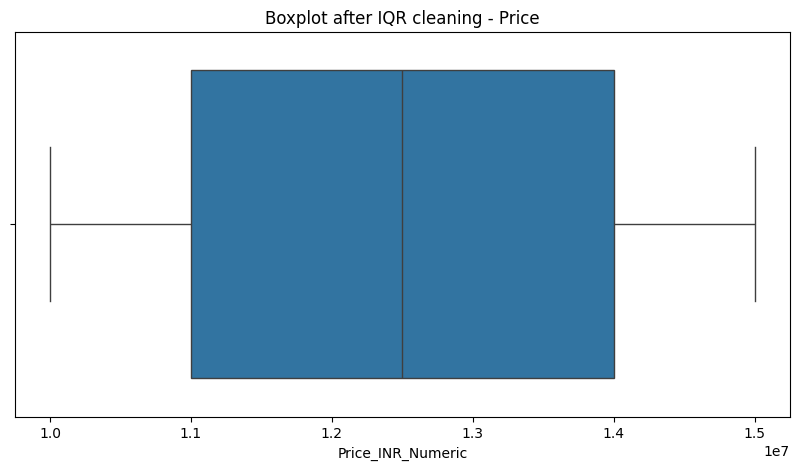

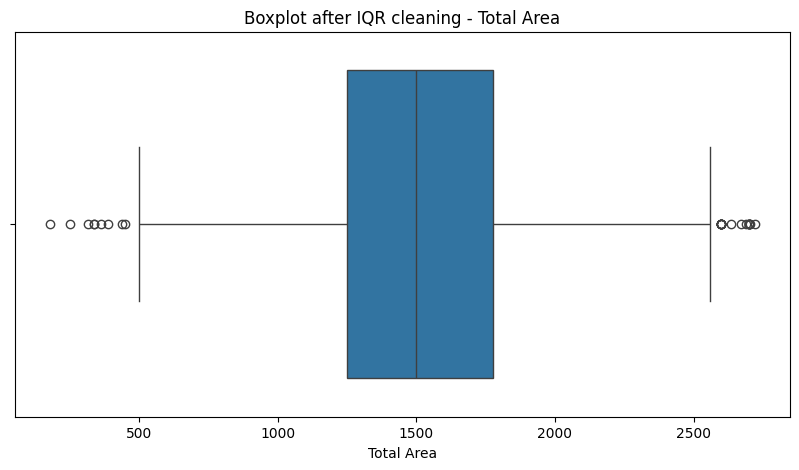

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Price_INR_Numeric"])
plt.title("Boxplot after IQR cleaning - Price")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Total Area"])
plt.title("Boxplot after IQR cleaning - Total Area")
plt.show()


In [13]:
import os

os.makedirs("data/processed", exist_ok=True)
df.to_csv("data/processed/clean_df.csv", index=False)